# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6


### Zadanie 1

Zaimplementuj symulację paradoksu Monty'ego Halla. Np. po 10 000 rozgrywek dla obu przypadków (kiedy gracz zostaje przy wybranej bramke oraz kiedy gracz zmienia wybór).
Czy wnik symulacji jest zgodny z teorią? 

Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.
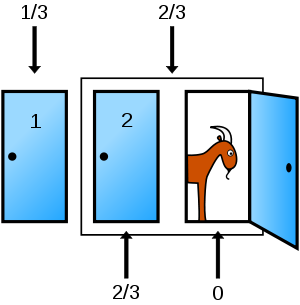




In [1]:
import numpy as np
import random

In [2]:
default = np.array([True,False,False])
np.random.shuffle(default)
default

array([False, False,  True])

In [3]:
# nie zmieniamy wyboru
score = []
iterations = 10_000
for i in range(iterations):
    np.random.shuffle(default)
    game = np.copy(default)
    doors1 = random.randint(0,2)
    if game[doors1]:
        score.append(True)
    else:
         score.append(False)
            
print(f'Nie zmieniając wyboru mamy: {np.count_nonzero(score)/len(score):.2f}% szans na wygraną')

# zmieniając wybór
score = []
for i in range(iterations):
    np.random.shuffle(default)
    game = np.copy(default)
    doors = [0,1,2]
    doors1 = random.choice(doors)
    
    for i, d in enumerate(game):
        if i != doors1:
            if d != True:
                if len(doors)>2:
                    doors = np.delete(doors, i, 0)
        
    for d in doors:
        if d != doors1:
            if game[d]:
                score.append(True)
            else:
                score.append(False)
    
            
print(f'Zmieniając wyboru mamy: {np.count_nonzero(score)/len(score):.2f}% szans na wygraną')


Nie zmieniając wyboru mamy: 0.34% szans na wygraną
Zmieniając wyboru mamy: 0.66% szans na wygraną


### Zadanie 2

#### A)
Wczytaj z klawiatury $m$ liter (mogą się powtarzać), a następnie wypisz wszystkie permutacje tych $m$ liter, podkreślając te, które tworzą poprawne polskie słowa (na podstawie słownika ściągniętego i wypakowanego z https://sjp.pl/sl/growy/).

Warunki:
- W jednej linii należy wypisać 5 permutacji, po czym przejść do nowego wiersza.
- Jeśli wprowadzony napis zawiera znaki spoza `[a-z]` (tylko litery łacińskie), to należy wypisać stosowny komunikat.
- Wprowadzone litery mogą się powtarzać, ale permutacji wtedy nie powtarzamy. 
Przykładowo, dla wprowadzonego ciągu `aaab` program ma wypisać tylko 4 permutacje (w dowolnej kolejności): `aaab`, `aaba`, `abaa`, `baaa`.

Przykład:

```
Podaj 4 litery z [a-z]: aatm
aatm    aamt    atam    atma    amat

amta    taam    tama    tmaa    maat
                ----
mata    mtaa
----
```

#### B)
Napisz wzór, który umożliwi wyświetlenie liczby tak opisanych permutacji bez konieczności ich generowania.



In [4]:
my_file = open("slowa.txt", encoding='UTF-8')
data = my_file.read()
words = data.replace('\n', ' ').split(" ")
pl_words = set(words)
my_file.close()


In [5]:
def permute(string, i=0):
    if i == len(string):  
        permutations.append("".join(string))
    
    for j in range(i, len(string)):
        words = [c for c in string]
        words[i], words[j] = words[j], words[i]
        permute(words, i + 1)
    

In [70]:
x = input('Podaj litery: ')
if not x.isalpha():
    print("Tylko litery")
else:
    permutations= []
    permute(x)


    mydict = list( dict.fromkeys(permutations) )


    full = int(len(mydict) /5)

    under = []
    for i,w in enumerate(mydict):
        if w in pl_words:
            under.append('-'*len(w))
        else:
            under.append('')

    for i in range(full):
        print(f'{mydict[0+i*5]:10}{mydict[1+i*5]:10}{mydict[2+i*5]:10}{mydict[3+i*5]:10}{mydict[4+i*5]:10}')
        print(f'{under[0+i*5]:10}{under[1+i*5]:10}{under[2+i*5]:10}{under[3+i*5]:10}{under[4+i*5]:10}')

    for i in range(len(mydict)-(full*5)):
        print(f'{mydict[-i-1]:10}',end="")
    print()
    for i in range(len(under)-(full*5)):
        print(f'{under[-i-1]:10}',end="")

Podaj litery: pies
pies      pise      peis      pesi      psei      
----                                              
psie      ipes      ipse      ieps      iesp      
----                                              
isep      ispe      eips      eisp      epis      
                                                  
epsi      espi      esip      siep      sipe      
                              ----                
spie      spei      sepi      seip      
----                                    

### Wzór 
$$\frac{n!}{ka! * kb! *...*kz!}$$
- n-liczba liter
- ka-liczba wystąpień danej litery



In [71]:
len(permutations)

24

In [72]:
len(mydict)

24

In [2]:
def silnia(n):
    if n > 1:
        return n*silnia(n-1)
    return 1

In [3]:
silnia(4)/ silnia(1)*silnia(1)*silnia(1)*silnia(1)

24.0